In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

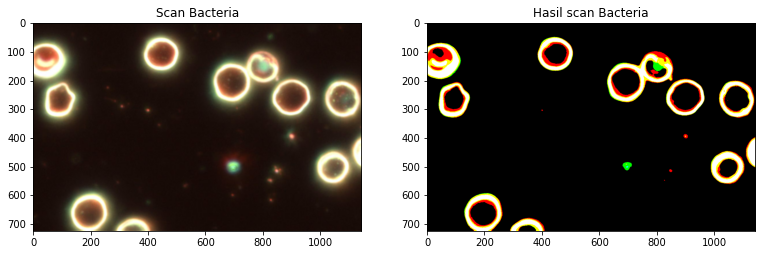

In [ ]:
img  = cv.imread('/content/drive/MyDrive/Bacteria/168.png', cv.IMREAD_COLOR)
#1
blur = cv.GaussianBlur (img, (5,5),0)

#2
ret, thresh = cv.threshold(blur, 175, 255, cv.THRESH_BINARY)

titles = ['Scan Bacteria', 'Hasil scan Bacteria'] 
bentuk_bakteri = [blur, thresh]

plt. figure(figsize = (20,15)) 
for i in range(len(bentuk_bakteri)):
    plt. subplot(1,3,i+1),plt.imshow(bentuk_bakteri[i]) 
    plt.title(titles[i])
plt.show()

In [ ]:
import os 
import glob
from mpl_toolkits.axes_grid1 import ImageGrid
from google.colab.patches import cv2_imshow

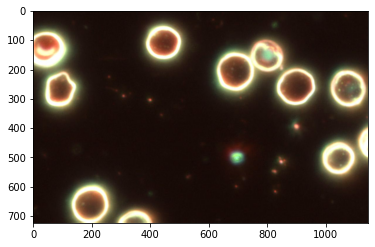

In [ ]:
image  = cv.imread('/content/drive/MyDrive/Bacteria/168.png', cv.IMREAD_COLOR)

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY, 0.7)
plt.imshow(image)

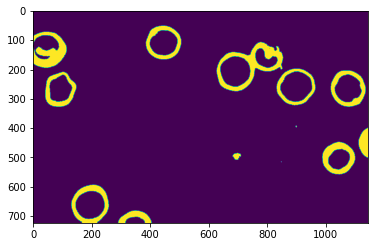

In [ ]:
(T, thresh) = cv.threshold(gray, 175, 255, cv.THRESH_BINARY)
plt.imshow(thresh)

7518.0
1122.5
6634.0


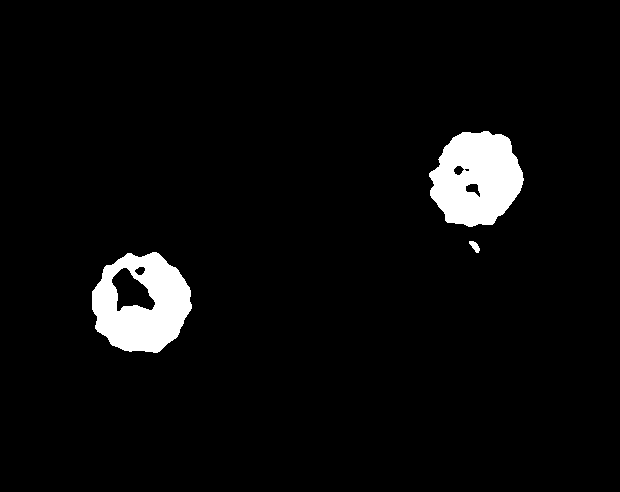

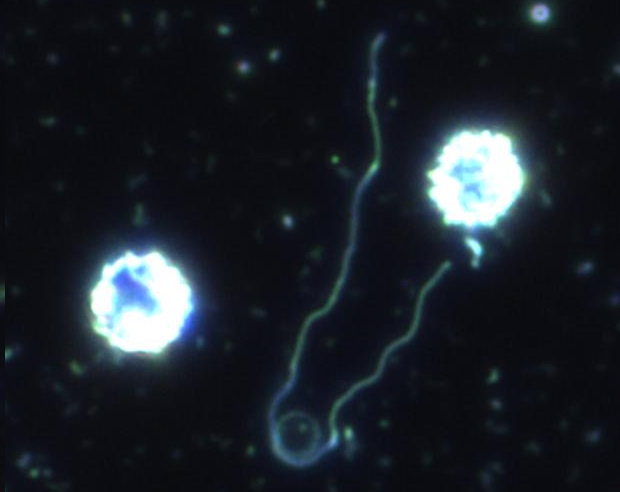

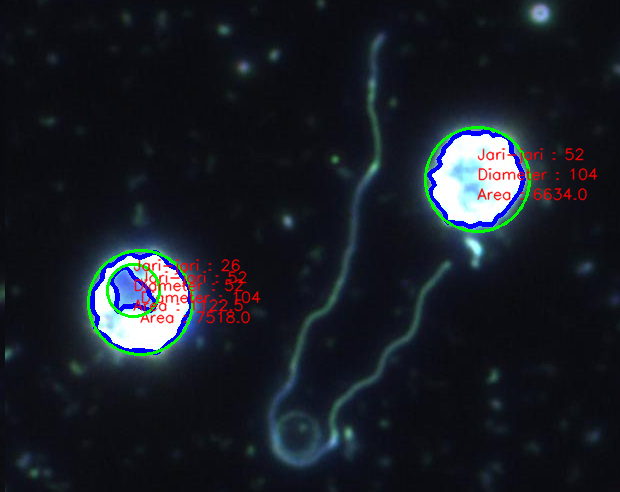

-1

In [ ]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('/content/drive/MyDrive/Bacteria/231.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)[1]

# Find bounding box
# x,y,w,h = cv2.boundingRect(thresh)
# cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
# cv2.putText(image, "w={},h={}".format(w,h), (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (36,255,12), 2)

# find contours and get one with area about 180*35
# draw all contours in green and accepted ones in red
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
#area_thresh = 0
min_area = 1000
max_area = 10000
result = image.copy()
for c in contours:
    area = cv2.contourArea(c)
    # x,y,w,h = cv2.boundingRect(c)
    if area > min_area and area < max_area:
        cv2.drawContours(result, [c], -1, (255, 0, 0), 3)
        (x,y),radius = cv2.minEnclosingCircle(c)
        center = (int(x),int(y))
        radius = int(radius)
        cv2.circle(result,center,radius,(0,255,0),2)
        cv2.putText(result,"Jari-jari : "+str(radius),(int(x),int(y-20)), cv2.FONT_HERSHEY_SIMPLEX, .5,(0,0,255),1,cv2.LINE_AA)
        cv2.putText(result,"Diameter : "+str(radius*2),center, cv2.FONT_HERSHEY_SIMPLEX, .5,(0,0,255),1,cv2.LINE_AA)
        cv2.putText(result,"Area : "+str(area),(int(x),int(y+20)), cv2.FONT_HERSHEY_SIMPLEX, .5,(0,0,255),1,cv2.LINE_AA)
        print(area)


# save result
cv2.imwrite('/content/drive/MyDrive/braintumor/box_found.png', result)
cv2_imshow(thresh)
cv2_imshow(image)
cv2_imshow(result)
cv2.waitKey()